In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import socceraction

from statsbombpy import sb

In [2]:
from socceraction.data.statsbomb import StatsBombLoader

path = 'D:\Football Data Science\Data\Event\Statsbomb\data'

api = StatsBombLoader(getter="local", root=path)

df_games = [api.games(competition_id=9, season_id=27)['game_id'], # 德甲2015/2016赛季
            api.games(competition_id=11, season_id=27)['game_id'], # 西甲2015/2016赛季
            api.games(competition_id=7, season_id=27)['game_id'], # 法甲2015/2016赛季
            api.games(competition_id=2, season_id=27)['game_id'],  # 英超2015/2016赛季
            api.games(competition_id=12, season_id=27)['game_id']] # 意甲2015/2016赛季

In [3]:
X_Bundesliga = pd.read_csv('data/X_1516_Bundesliga.csv', index_col=0)
X_LaLiga = pd.read_csv('data/X_1516_LaLiga.csv', index_col=0)
X_Ligue1 = pd.read_csv('data/X_1516_Ligue1.csv', index_col=0)
X_PremierLeague = pd.read_csv('data/X_1516_PremierLeague.csv', index_col=0)
X_SerieA = pd.read_csv('data/X_1516_SerieA.csv', index_col=0)

X = pd.concat([X_Bundesliga, X_LaLiga, X_Ligue1, X_PremierLeague, X_SerieA], ignore_index=True)
X

,period_id_a0,time_seconds_a0,time_seconds_overall_a0,period_id_a1,time_seconds_a1,time_seconds_overall_a1,period_id_a2,time_seconds_a2,time_seconds_overall_a2,team_1,...,dy_a2,goalscore_team,goalscore_opponent,goalscore_diff,actiontype_a0,actiontype_a1,actiontype_a2,bodypart_a0,bodypart_a1,bodypart_a2
0,1,0.4820,0.4820,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,pass,pass,pass,foot,foot,foot
1,1,0.7085,0.7085,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,receival,pass,pass,foot,foot,foot
2,1,0.9350,0.9350,1,0.7085,0.7085,1,0.4820,0.4820,True,...,0.936535,0,0,0,dribble,receival,pass,foot,foot,foot
3,1,1.0150,1.0150,1,0.9350,0.9350,1,0.7085,0.7085,True,...,0.000000,0,0,0,pass,dribble,receival,foot,foot,foot
4,1,1.5910,1.5910,1,1.0150,1.0150,1,0.9350,0.9350,True,...,-0.436904,0,0,0,receival,pass,dribble,foot,foot,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474172,2,2930.8385,5630.8385,2,2928.5210,5628.5210,2,2927.6690,5627.6690,False,...,1.000000,1,2,-1,interception,pass,dribble,foot,foot,foot
5474173,2,2933.1560,5633.1560,2,2930.8385,5630.8385,2,2928.5210,5628.5210,True,...,-0.542151,1,2,-1,dribble,interception,pass,foot,foot,foot
5474174,2,2935.1310,5635.1310,2,2933.1560,5633.1560,2,2930.8385,5630.8385,True,...,-0.000000,1,2,-1,pass,dribble,interception,foot,foot,foot
5474175,2,2938.2210,5638.2210,2,2935.1310,5635.1310,2,2933.1560,5633.1560,False,...,0.208129,2,1,1,interception,pass,dribble,foot,foot,foot


In [4]:
info_Bundesliga = pd.read_csv('data/info_1516_Bundesliga.csv', index_col=0)
info_LaLiga = pd.read_csv('data/info_1516_LaLiga.csv', index_col=0)
info_Ligue1 = pd.read_csv('data/info_1516_Ligue1.csv', index_col=0)
info_PremierLeague = pd.read_csv('data/info_1516_PremierLeague.csv', index_col=0)
info_SerieA = pd.read_csv('data/info_1516_SerieA.csv', index_col=0)

info = pd.concat([info_Bundesliga, info_LaLiga, info_Ligue1, info_PremierLeague, info_SerieA], ignore_index=True)
info

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
0,3890561,644e16d7-10ca-45f0-8128-fc0055d6f753,0,1,0.4820,175,8387.0,53.33125,33.9575,-0.7000,1.870,0,4,pass,foot_left
1,3890561,644e16d7-10ca-45f0-8128-fc0055d6f753,1,1,0.7085,175,5460.0,52.63125,35.8275,0.0000,0.000,23,0,receival,foot
2,3890561,329a1879-2521-4614-8c68-b4798b0e5d23,2,1,0.9350,175,5460.0,52.63125,35.8275,-0.7000,-0.340,21,0,dribble,foot
3,3890561,77e2ddaf-6de3-49e7-a318-7d765799b543,3,1,1.0150,175,5460.0,51.93125,35.4875,-4.8125,-3.230,0,4,pass,foot_left
4,3890561,77e2ddaf-6de3-49e7-a318-7d765799b543,4,1,1.5910,175,6039.0,47.11875,32.2575,0.0000,0.000,23,0,receival,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474172,3878540,71006080-9dd2-401c-b02f-d8f8947644c5,3306,2,2930.8385,240,7174.0,12.64375,33.4475,-0.0000,-0.000,24,0,interception,foot
5474173,3878540,34beca91-bdec-408c-81d3-d423e74ec518,3307,2,2933.1560,240,7174.0,12.64375,33.4475,9.1875,-1.955,21,0,dribble,foot
5474174,3878540,7c4c3eae-84c0-4da0-baa4-e87d11376565,3308,2,2935.1310,240,7174.0,21.83125,31.4925,42.4375,-9.180,0,5,pass,foot_right
5474175,3878540,d4d557ff-725e-4cfa-afee-e14fa9e3ed4b,3309,2,2938.2210,236,7778.0,40.73125,45.6875,0.0000,0.000,24,0,interception,foot


### 模型评估——brier score (normalized)

In [5]:
brier_scores, brier_concedes = 0.00614903971757508, 0.0009645086524139488 # from do-model_fitting_score/concede
brier_scores_baseline, brier_concedes_baseline = 0.007397702760720019, 0.001107928767007137 # from do-model_baseline

NBS_score = brier_scores / brier_scores_baseline
NBS_concede = brier_concedes / brier_concedes_baseline

NBS_score, NBS_concede

(0.8312093519389516, 0.8705511411346318)

### 模型评估——xG calibration

In [6]:
import joblib

model_score = joblib.load('data/model_score.dat')
model_concede = joblib.load('data/model_concede.dat')

categorical_features = ['period_id_a0', 'period_id_a1', 'period_id_a2', 'actiontype_a0', 'actiontype_a1', 'actiontype_a2', 'bodypart_a0', 'bodypart_a1', 'bodypart_a2']
for col in categorical_features:
    if X[col].dtype != 'category':
        # print(col, X[col].dtype)
        X[col] = X[col].astype('category')
        
Y_hat = pd.DataFrame({'scores': model_score.predict_proba(X)[:,1], 'concedes': model_concede.predict_proba(X)[:,1]})
Y_hat

,scores,concedes
0,0.000108,0.000093
1,0.000099,0.000154
2,0.000125,0.000135
3,0.000211,0.000145
4,0.000126,0.000081
...,...,...
5474172,0.000969,0.001913
5474173,0.002341,0.000795
5474174,0.003798,0.000955
5474175,0.002772,0.001575


In [7]:
shots = []
for i in range(5):
    for game_id in df_games[i]:
        df_events0 = api.events(game_id)
        shots0 = df_events0[df_events0['type_name'] == 'Shot']
        shots.append(shots0)
shots = pd.concat(shots, ignore_index=True)

xGs_shot = pd.DataFrame({'original_event_id':shots['event_id'].tolist(),
                         'xG':pd.DataFrame([x['shot'] for x in shots['extra']])['statsbomb_xg'],
                         'type_name':'shot'})
xGs_penalty = pd.DataFrame({'original_event_id':shots['event_id'].tolist(),
                            'xG':pd.DataFrame([x['shot'] for x in shots['extra']])['statsbomb_xg'],
                            'type_name':'shot_penalty'})
xGs_freekick = pd.DataFrame({'original_event_id':shots['event_id'].tolist(),
                             'xG':pd.DataFrame([x['shot'] for x in shots['extra']])['statsbomb_xg'],
                             'type_name':'shot_freekick'})
xGs = pd.concat([xGs_shot, xGs_penalty, xGs_freekick])

xGs = pd.merge(info, xGs, on=['original_event_id', 'type_name'], how='left')[['team_id','xG']]
shot_indices = xGs['xG'].notna()

result_cali = pd.DataFrame({'xG': xGs[shot_indices]['xG'], 'xG_pred': Y_hat[shot_indices]['scores']})
print('MAE between xG and xG_pred is: ', abs(result_cali['xG'] - result_cali['xG_pred']).mean())
result_cali

MAE between xG and xG_pred is:  0.02751620742116184


,xG,xG_pred
229,0.087901,0.078539
315,0.160274,0.313289
362,0.016036,0.029827
539,0.527759,0.076705
650,0.074020,0.072271
...,...,...
5474070,0.030999,0.058208
5474091,0.042634,0.048982
5474092,0.038101,0.046244
5474093,0.063746,0.103604


Hosmer-Lemeshow statistic: 7.4487
Degrees of freedom: 18
P-value: 0.9858


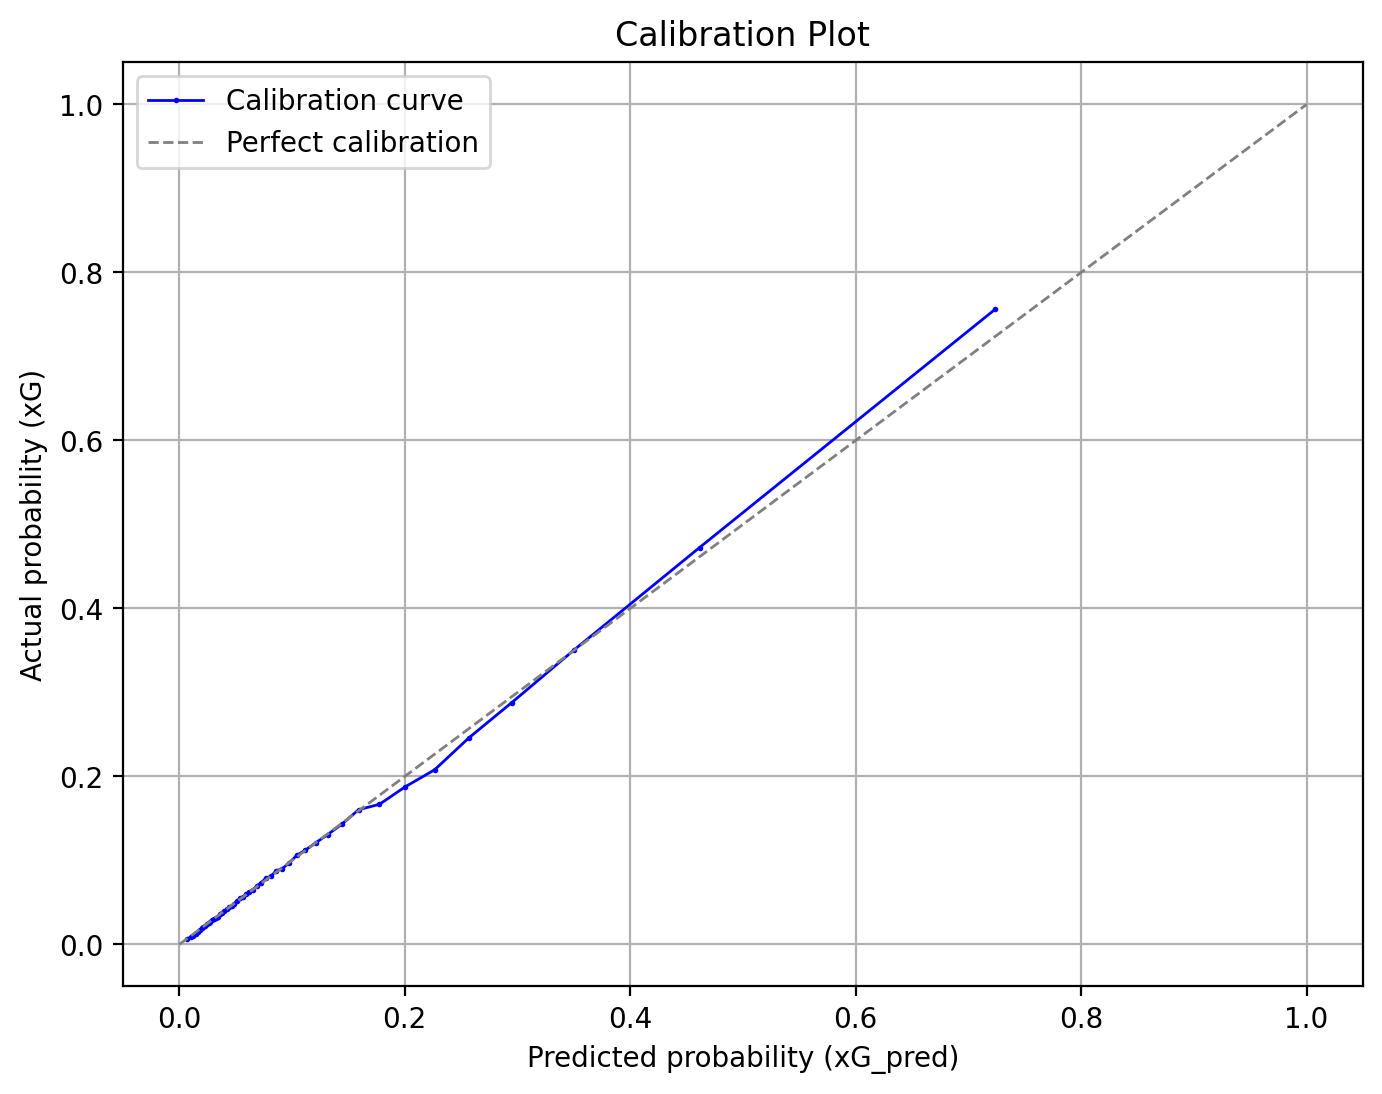

In [8]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from scipy.stats import chi2

def hosmer_lemeshow_test(y_true, y_prob, g=20):
    data = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    data['decile'] = pd.qcut(data['y_prob'], q=g, labels=False, duplicates='drop')

    obs = data.groupby('decile')['y_true'].sum()
    exp = data.groupby('decile')['y_prob'].sum()
    n = data.groupby('decile').size()

    hl_stat = np.sum((obs - exp)**2 / (exp * (1 - exp / n + 1e-10))) # 避免除以0的误差
    df = g - 2
    p_value = 1 - chi2.cdf(hl_stat, df)

    print(f"Hosmer-Lemeshow statistic: {hl_stat:.4f}")
    print(f"Degrees of freedom: {df}")
    print(f"P-value: {p_value:.4f}")
    return hl_stat, p_value

def plot_calibration_curve(result_cali, g=50):
    cuts = pd.qcut(result_cali['xG_pred'], q=g, labels=False)
    prob_true = [result_cali[cuts == i]['xG'].mean() for i in range(g)]
    prob_pred = [result_cali[cuts == i]['xG_pred'].mean() for i in range(g)]

    plt.figure(dpi=200, figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', markersize=1, linewidth=1, label='Calibration curve', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1, color='gray', label='Perfect calibration')
    plt.xlabel('Predicted probability (xG_pred)')
    plt.ylabel('Actual probability (xG)')
    plt.title('Calibration Plot')
    plt.legend()
    plt.grid(True)
    plt.show()
    
hl_stat, p_val = hosmer_lemeshow_test(result_cali['xG'], result_cali['xG_pred'])
plot_calibration_curve(result_cali)

### 模型解读——变量重要性

In [9]:
feature_score = pd.DataFrame({'feature': model_score.feature_names_in_, 'importance': model_score.feature_importances_})
feature_score.sort_values('importance', ascending=False)

,feature,importance
40,actiontype_a0,0.492314
19,dist_to_goal_a0,0.239107
43,bodypart_a0,0.029747
31,dx_a0,0.019394
41,actiontype_a1,0.013443
25,mov_d_a0,0.012322
39,goalscore_diff,0.010139
20,angle_to_goal_a0,0.007265
42,actiontype_a2,0.007036
37,goalscore_team,0.005927


In [10]:
feature_concede = pd.DataFrame({'feature': model_concede.feature_names_in_, 'importance': model_concede.feature_importances_})
feature_concede.sort_values('importance', ascending=False)

,feature,importance
40,actiontype_a0,0.503751
41,actiontype_a1,0.069205
13,x_a0,0.061479
11,time_delta_1,0.043963
20,angle_to_goal_a0,0.041215
15,x_a1,0.026900
25,mov_d_a0,0.019456
31,dx_a0,0.011981
42,actiontype_a2,0.010774
10,team_2,0.010141


### 模型解读——案例分析

In [11]:
import socceraction.atomic.vaep.formula as vaepformula

values = pd.DataFrame(columns=['offensive_value', 'defensive_value', 'vaep_value'], index=Y_hat.index)

inds = info.groupby('game_id').indices # dict of game_id:indices
for game_id, game_inds in inds.items():
    info0 = info.loc[game_inds]
    Y_hat0 = Y_hat.loc[game_inds]
    value0 = vaepformula.value(info0, Y_hat0["scores"], Y_hat0["concedes"]) # 对于开球那下动作没有做处理，但确实也没必要
    values.loc[game_inds] = value0
    
values['player_id'] = info['player_id'].astype(int)
values

,offensive_value,defensive_value,vaep_value,player_id
0,0.0,-0.0,0.0,8387
1,-0.000008,-0.000062,-0.00007,5460
2,0.000025,0.000019,0.000045,5460
3,0.000086,-0.00001,0.000076,5460
4,-0.000085,0.000065,-0.00002,6039
...,...,...,...,...
5474172,0.000565,0.020412,0.020978,7174
5474173,0.001372,0.001118,0.00249,7174
5474174,0.001457,-0.00016,0.001297,7174
5474175,0.001817,0.002223,0.00404,7778


#### 案例1：皇家马德里0-4巴塞罗那

##### Goal Case 1: 苏亚雷斯11分钟首开纪录

In [12]:
event_id_0 = '5e8ba3db-ecc3-475f-890d-44f3993858d9'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
2010643,266424,5e8ba3db-ecc3-475f-890d-44f3993858d9,496,1,606.146,217,5246.0,92.79375,28.4325,12.1625,8.585,11,5,shot,foot_right
2010644,266424,5e8ba3db-ecc3-475f-890d-44f3993858d9,497,1,606.146,217,5246.0,104.95625,37.0175,-0.0000,-0.000,27,5,goal,foot_right


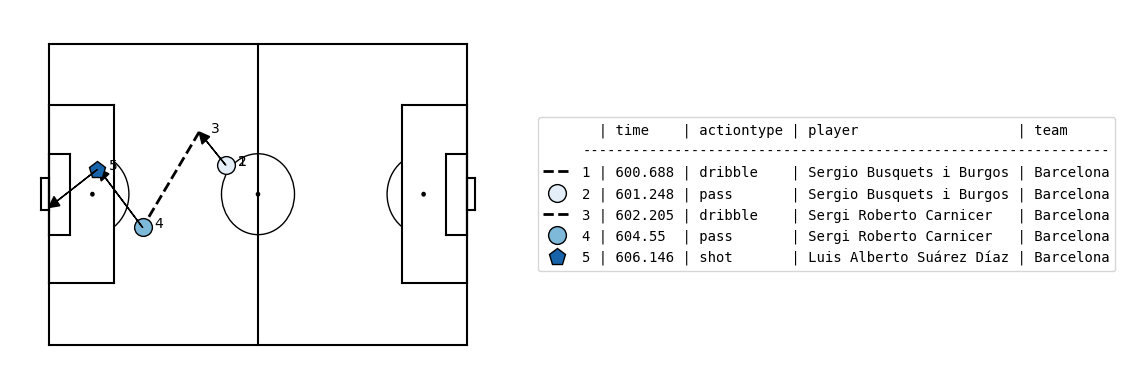

In [13]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=11, season_id=27) # 西甲2015/2016赛季

ind_to_check = 2010644 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 4):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [14]:
lags = 8

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.004101,0.000183,-0.000586,0.000029,-0.000557,Sergio Busquets,receival
1,0.003670,0.000231,-0.000431,-0.000048,-0.000479,Sergio Busquets,dribble
2,0.006676,0.000151,0.003006,0.000079,0.003085,Sergio Busquets,pass
3,0.006716,0.000125,0.00004,0.000027,0.000067,Sergi Roberto,receival
4,0.037729,0.000148,0.031012,-0.000023,0.030989,Sergi Roberto,dribble
5,0.059373,0.000113,0.021645,0.000035,0.02168,Sergi Roberto,pass
6,0.103002,0.000150,0.043629,-0.000037,0.043592,Luis Suárez,receival
7,0.228802,0.000039,0.1258,0.00011,0.125911,Luis Suárez,shot
8,0.999811,0.000073,0.771009,-0.000033,0.770976,Luis Suárez,goal


进球动作序列：
- Sergio Busquets: ['dribble', 'pass']
- Sergi Roberto: ['dribble', 'pass']
- Luis Suárez: 'shot'

In [15]:
vaep_delta = pd.DataFrame({
    'action':['Sergio Busquets dribble + pass', 'Sergi Roberto dribble + pass', 'Luis Suárez shot', 'Luis Suárez goal'],
    'P_score':[vaep_detailed.loc[2,'Y_hat_scores'], vaep_detailed.loc[5,'Y_hat_scores'],
               vaep_detailed.loc[7,'Y_hat_scores'], vaep_detailed.loc[8,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0:2,'vaep_value'].sum(), vaep_detailed.loc[3:5,'vaep_value'].sum(),
                  vaep_detailed.loc[6:7,'vaep_value'].sum(), vaep_detailed.loc[8,'vaep_value']]
    })

print('xG:', df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[7, 'Y_hat_scores'])

vaep_delta

xG: 0.25853002
Predicted xG: 0.22880214


,action,P_score,vaep_value
0,Sergio Busquets dribble + pass,0.006676,0.002050
1,Sergi Roberto dribble + pass,0.059373,0.052735
2,Luis Suárez shot,0.228802,0.169502
3,Luis Suárez goal,0.999811,0.770976


##### Goal Case 2: 伊涅斯塔53分钟打入第三粒进球

In [16]:
event_id_0 = '11b23607-fae8-4943-9ce7-3bd43cffa04b'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
2012331,266424,11b23607-fae8-4943-9ce7-3bd43cffa04b,2184,2,439.353,217,5216.0,90.25625,28.4325,14.7,2.295,11,5,shot,foot_right
2012332,266424,11b23607-fae8-4943-9ce7-3bd43cffa04b,2185,2,439.353,217,5216.0,104.95625,30.7275,-0.0,-0.000,27,5,goal,foot_right


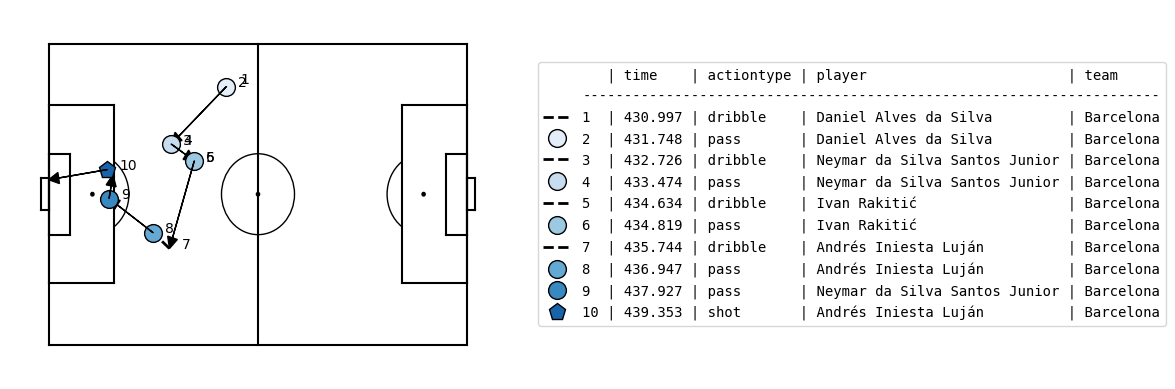

In [17]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=11, season_id=27) # 西甲2015/2016赛季

ind_to_check = 2012332 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 9):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [18]:
lags = 16

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.002924,0.000102,0.000298,0.000088,0.000386,Dani Alves,receival
1,0.003655,0.000129,0.000731,-0.000027,0.000704,Dani Alves,dribble
2,0.010401,0.000124,0.006747,0.000005,0.006752,Dani Alves,pass
3,0.012408,0.000175,0.002006,-0.000052,0.001955,Neymar,receival
4,0.011823,0.000383,-0.000585,-0.000208,-0.000793,Neymar,dribble
5,0.004876,0.000198,-0.006947,0.000186,-0.006761,Neymar,pass
6,0.007381,0.000109,0.002504,0.000089,0.002593,Ivan Rakitić,receival
7,0.008050,0.000184,0.000669,-0.000075,0.000594,Ivan Rakitić,dribble
8,0.010500,0.000091,0.00245,0.000093,0.002543,Ivan Rakitić,pass
9,0.015454,0.000078,0.004954,0.000013,0.004966,Andrés Iniesta,receival


进球动作序列：
- Dani Alves: ['dribble', 'pass']
- Neymar: ['dribble', 'pass']
- Ivan Rakitić: ['dribble', 'pass']
- Andrés Iniesta: 'dribble', 'pass'
- Neymar: 'pass'
- Andrés Iniesta: 'shot'

In [19]:
vaep_delta = pd.DataFrame({
    'action':['Dani Alves dribble + pass', 'Neymar dribble + pass', 'Ivan Rakitić dribble + pass',
              'Andrés Iniesta dribble', 'Andrés Iniesta pass', 'Neymar pass', 'Andrés Iniesta shot', 'Andrés Iniesta goal'],
    'P_score':[vaep_detailed.loc[2,'Y_hat_scores'], vaep_detailed.loc[5,'Y_hat_scores'],
               vaep_detailed.loc[8,'Y_hat_scores'], vaep_detailed.loc[10,'Y_hat_scores'],
               vaep_detailed.loc[11,'Y_hat_scores'], vaep_detailed.loc[13,'Y_hat_scores'],
               vaep_detailed.loc[15,'Y_hat_scores'], vaep_detailed.loc[16,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0:2,'vaep_value'].sum(), vaep_detailed.loc[3:5,'vaep_value'].sum(),
                  vaep_detailed.loc[6:8,'vaep_value'].sum(), vaep_detailed.loc[9:10,'vaep_value'].sum(),
                  vaep_detailed.loc[11,'vaep_value'], vaep_detailed.loc[12:13,'vaep_value'].sum(),
                  vaep_detailed.loc[14:15,'vaep_value'].sum(), vaep_detailed.loc[16,'vaep_value']]
    })

print('xG: ',
      df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[15, 'Y_hat_scores'])

vaep_delta

xG:  0.11742188
Predicted xG: 0.115774244


,action,P_score,vaep_value
0,Dani Alves dribble + pass,0.010401,0.007842
1,Neymar dribble + pass,0.004876,-0.005599
2,Ivan Rakitić dribble + pass,0.010500,0.005730
3,Andrés Iniesta dribble,0.024779,0.014247
4,Andrés Iniesta pass,0.064168,0.039366
5,Neymar pass,0.057903,-0.006303
6,Andrés Iniesta shot,0.115774,0.058020
7,Andrés Iniesta goal,0.999802,0.883986


##### Miss Case 1: 穆尼尔88分钟射门偏出

In [20]:
event_id_0 = 'f31baa81-ba3f-4d2d-8a40-8f1c0be4c350'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
2013563,266424,f31baa81-ba3f-4d2d-8a40-8f1c0be4c350,3416,2,2581.368,217,6616.0,92.88125,33.7025,12.075,-5.185,11,4,shot,foot_left
2013564,266424,f31baa81-ba3f-4d2d-8a40-8f1c0be4c350,3417,2,2581.368,217,6616.0,104.95625,28.5175,-0.000,-0.000,25,4,out,foot_left


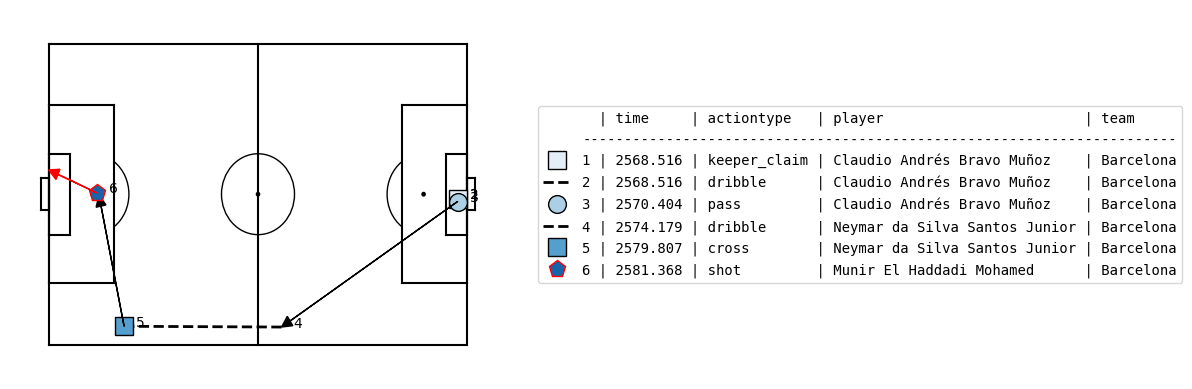

In [21]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=11, season_id=27) # 西甲2015/2016赛季

ind_to_check = 2013564 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 5):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [22]:
lags = 8

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.009222,0.006354,0.006445,0.015864,0.022308,Claudio Bravo,keeper_claim
1,0.005562,0.001241,-0.00366,0.005114,0.001453,Claudio Bravo,dribble
2,0.023334,0.000947,0.017772,0.000293,0.018065,Claudio Bravo,pass
3,0.019439,0.000707,-0.003895,0.000241,-0.003654,Neymar,receival
4,0.093830,0.000366,0.07439,0.000341,0.074731,Neymar,dribble
5,0.102980,0.000277,0.00915,0.000089,0.009239,Neymar,cross
6,0.143224,0.000160,0.040244,0.000117,0.040361,Munir El Haddadi,receival
7,0.154386,0.000035,0.011162,0.000125,0.011287,Munir El Haddadi,shot
8,0.000733,0.000294,-0.153653,-0.000259,-0.153912,Munir El Haddadi,out


射门动作序列：
- Claudio Bravo: 'keeper_claim'
- Claudio Bravo: ['dribble', 'pass']
- Neymar: 'dribble'
- Neymar: 'cross'
- Munir El Haddadi: 'shot'

In [23]:
vaep_delta = pd.DataFrame({
    'action':['Claudio Bravo keeper_claim', 'Claudio Bravo dribble + pass', 'Neymar dribble',
              'Neymar cross', 'Munir El Haddadi shot', 'Munir El Haddadi out'],
    'P_score':[vaep_detailed.loc[0,'Y_hat_scores'], vaep_detailed.loc[2,'Y_hat_scores'],
               vaep_detailed.loc[4,'Y_hat_scores'], vaep_detailed.loc[5,'Y_hat_scores'],
               vaep_detailed.loc[7,'Y_hat_scores'], vaep_detailed.loc[8,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0,'vaep_value'], vaep_detailed.loc[1:2,'vaep_value'].sum(),
                  vaep_detailed.loc[3:4,'vaep_value'].sum(), vaep_detailed.loc[5,'vaep_value'],
                  vaep_detailed.loc[6:7,'vaep_value'].sum(), vaep_detailed.loc[8,'vaep_value']]
    })

print('xG: ',
      df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[7, 'Y_hat_scores'])

vaep_delta

xG:  0.14040372
Predicted xG: 0.15438636


,action,P_score,vaep_value
0,Claudio Bravo keeper_claim,0.009222,0.022308
1,Claudio Bravo dribble + pass,0.023334,0.019519
2,Neymar dribble,0.093830,0.071077
3,Neymar cross,0.102980,0.009239
4,Munir El Haddadi shot,0.154386,0.051649
5,Munir El Haddadi out,0.000733,-0.153912


#### 案例2：拜仁慕尼黑5-1多特蒙德

##### Goal Case 1: 奥巴梅扬36分钟扳回一球

In [24]:
event_id_0 = 'd6de4572-2d67-4987-bf28-0a9495d0df07'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
710467,3890329,d6de4572-2d67-4987-bf28-0a9495d0df07,1278,1,2162.073,180,3712.0,102.24375,37.0175,2.7125,-1.53,11,4,shot,foot_left
710468,3890329,d6de4572-2d67-4987-bf28-0a9495d0df07,1279,1,2162.073,180,3712.0,104.95625,35.4875,-0.0000,-0.00,27,4,goal,foot_left


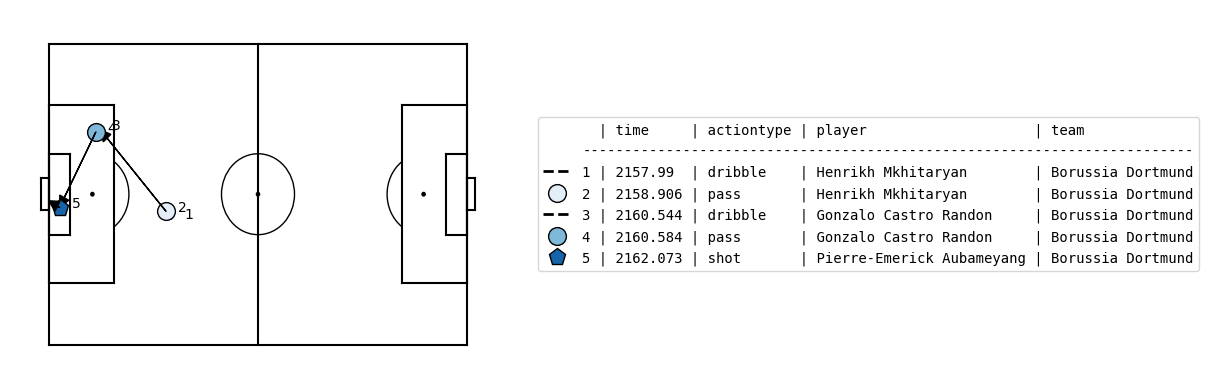

In [25]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=9, season_id=27) # 德甲2015/2016赛季

ind_to_check = 710468 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 4):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [26]:
lags = 8

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.029688,0.000311,0.006704,-0.000058,0.006645,Henrikh Mkhitaryan,receival
1,0.023335,0.000237,-0.006354,0.000075,-0.006279,Henrikh Mkhitaryan,dribble
2,0.056257,0.000224,0.032922,0.000013,0.032935,Henrikh Mkhitaryan,pass
3,0.060957,0.000175,0.004701,0.000049,0.00475,Gonzalo Castro,receival
4,0.133638,0.000189,0.072681,-0.000014,0.072667,Gonzalo Castro,dribble
5,0.100212,0.000152,-0.033426,0.000037,-0.033389,Gonzalo Castro,pass
6,0.521334,0.000105,0.421122,0.000047,0.421169,Pierre-Emerick Aubameyang,receival
7,0.632193,0.000036,0.110859,0.000068,0.110927,Pierre-Emerick Aubameyang,shot
8,0.999805,0.000189,0.367612,-0.000153,0.367459,Pierre-Emerick Aubameyang,goal


进球动作序列：
- Henrikh Mkhitaryan: ['dribble', 'pass']
- Gonzalo Castro: ['dribble', 'pass']
- Pierre-Emerick Aubameyang: 'shot'

In [27]:
vaep_delta = pd.DataFrame({
    'action':['Henrikh Mkhitaryan dribble + pass', 'Gonzalo Castro dribble + pass',
              'Pierre-Emerick Aubameyang shot', 'Pierre-Emerick Aubameyang goal'],
    'P_score':[vaep_detailed.loc[2,'Y_hat_scores'], vaep_detailed.loc[5,'Y_hat_scores'],
               vaep_detailed.loc[7,'Y_hat_scores'], vaep_detailed.loc[8,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0:2,'vaep_value'].sum(), vaep_detailed.loc[3:5,'vaep_value'].sum(),
                  vaep_detailed.loc[6:7,'vaep_value'].sum(), vaep_detailed.loc[8,'vaep_value']]
    })

print('xG: ',
      df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[7, 'Y_hat_scores'])

vaep_delta

xG:  0.8107498
Predicted xG: 0.63219315


,action,P_score,vaep_value
0,Henrikh Mkhitaryan dribble + pass,0.056257,0.033301
1,Gonzalo Castro dribble + pass,0.100212,0.044028
2,Pierre-Emerick Aubameyang shot,0.632193,0.532096
3,Pierre-Emerick Aubameyang goal,0.999805,0.367459


##### Goal Case 2: 莱万多夫斯基58分钟打入第四粒进球

In [28]:
event_id_0 = 'a3d09770-84ae-4fb2-934c-f55674c89fd0'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
711300,3890329,a3d09770-84ae-4fb2-934c-f55674c89fd0,2111,2,726.373,169,5668.0,94.80625,37.6975,10.15,-6.715,11,4,shot,foot_left
711301,3890329,a3d09770-84ae-4fb2-934c-f55674c89fd0,2112,2,726.373,169,5668.0,104.95625,30.9825,0.00,0.000,27,4,goal,foot_left


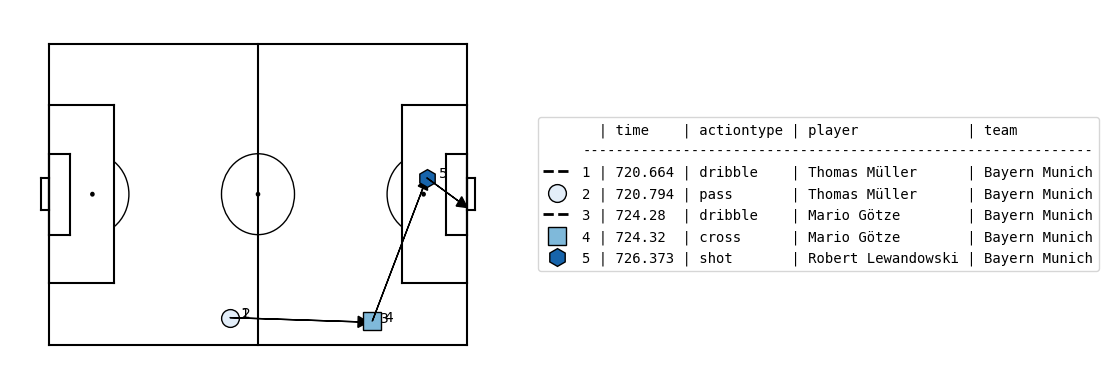

In [29]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=9, season_id=27) # 德甲2015/2016赛季

ind_to_check = 711301 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 4):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [30]:
lags = 8

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.004752,0.000173,0.000105,0.000222,0.000328,Thomas Müller,receival
1,0.004876,0.000239,0.000124,-0.000066,0.000058,Thomas Müller,dribble
2,0.014338,0.000317,0.009461,-0.000077,0.009384,Thomas Müller,pass
3,0.025912,0.000103,0.011574,0.000213,0.011788,Mario Götze,receival
4,0.014715,0.000115,-0.011198,-0.000012,-0.01121,Mario Götze,dribble
5,0.044541,0.000121,0.029827,-0.000006,0.029821,Mario Götze,cross
6,0.062986,0.000123,0.018445,-0.000002,0.018443,Robert Lewandowski,receival
7,0.180786,0.000035,0.1178,0.000088,0.117888,Robert Lewandowski,shot
8,0.999788,0.000095,0.819001,-0.00006,0.818942,Robert Lewandowski,goal


进球动作序列：
- Thomas Müller: ['dribble', 'pass']
- Mario Götze: ['dribble', 'cross']
- Robert Lewandowski: 'shot'

In [31]:
vaep_delta = pd.DataFrame({
    'action':['Thomas Müller dribble + pass', 'Mario Götze dribble + cross',
              'Robert Lewandowski shot', 'Robert Lewandowski goal'],
    'P_score':[vaep_detailed.loc[2,'Y_hat_scores'], vaep_detailed.loc[5,'Y_hat_scores'],
               vaep_detailed.loc[7,'Y_hat_scores'], vaep_detailed.loc[8,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0:2,'vaep_value'].sum(), vaep_detailed.loc[3:5,'vaep_value'].sum(),
                  vaep_detailed.loc[6:7,'vaep_value'].sum(), vaep_detailed.loc[8,'vaep_value']]
    })

print('xG: ',
      df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[7, 'Y_hat_scores'])

vaep_delta

xG:  0.16748144
Predicted xG: 0.18078609


,action,P_score,vaep_value
0,Thomas Müller dribble + pass,0.014338,0.009769
1,Mario Götze dribble + cross,0.044541,0.030399
2,Robert Lewandowski shot,0.180786,0.136331
3,Robert Lewandowski goal,0.999788,0.818942


#### 案例3：拜仁慕尼黑5-1沃尔夫斯堡

##### Goal Case 1: 莱万多夫斯基51分钟扳平比分

In [32]:
event_id_0 = 'a66d5c5d-5848-42cb-ac60-86d4ba31cfcd'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
781591,3890305,a66d5c5d-5848-42cb-ac60-86d4ba31cfcd,2199,2,344.184,169,5668.0,99.26875,35.4025,5.6875,0.935,11,4,shot,foot_left
781592,3890305,a66d5c5d-5848-42cb-ac60-86d4ba31cfcd,2200,2,344.184,169,5668.0,104.95625,36.3375,0.0000,0.000,27,4,goal,foot_left


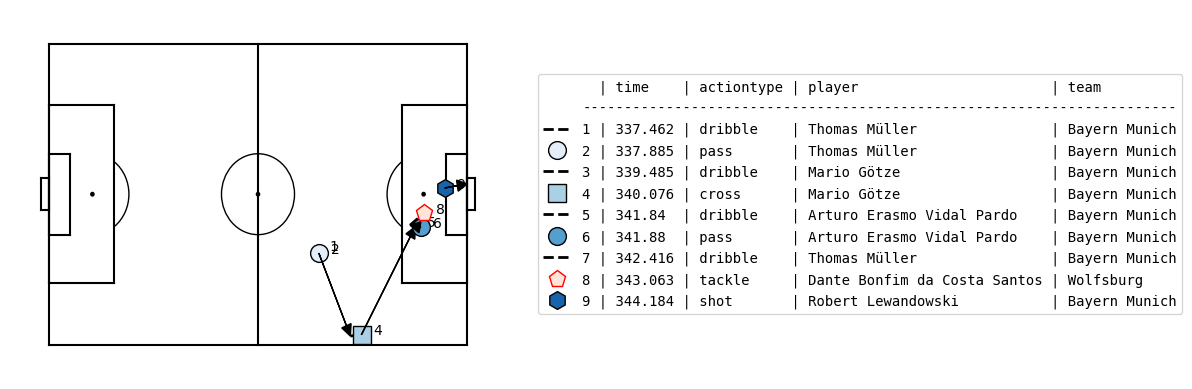

In [33]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=9, season_id=27) # 德甲2015/2016赛季

ind_to_check = 781592 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 8):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [34]:
lags = 12

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.018963,0.000304,0.004061,-0.000147,0.003914,Thomas Müller,dribble
1,0.010042,0.000315,-0.008921,-0.000011,-0.008932,Thomas Müller,pass
2,0.013768,0.000054,0.003725,0.000261,0.003986,Mario Götze,receival
3,0.010742,0.000065,-0.003025,-0.000012,-0.003037,Mario Götze,dribble
4,0.087427,0.000432,0.076685,-0.000366,0.076318,Mario Götze,cross
5,0.098610,0.000164,0.011183,0.000268,0.01145,Arturo Vidal,receival
6,0.086214,0.000187,-0.012396,-0.000023,-0.012418,Arturo Vidal,dribble
7,0.081434,0.000302,-0.004779,-0.000115,-0.004895,Arturo Vidal,pass
8,0.141785,0.000412,0.060351,-0.00011,0.060241,Thomas Müller,receival
9,0.162461,0.000297,0.020675,0.000115,0.020791,Thomas Müller,dribble


进球动作序列：
- Thomas Müller: ['dribble', 'pass']
- Mario Götze: ['dribble', 'cross']
- Arturo Vidal: ['dribble', 'pass']
- Thomas Müller: 'dribble'
- Dante: 'tackle'
- Robert Lewandowski: 'shot'

In [35]:
vaep_delta = pd.DataFrame({
    'action':['Thomas Müller dribble + pass', 'Mario Götze dribble + cross', 'Arturo Vidal dribble + pass',
              'Thomas Müller dribble', 'Dante tackle', 'Robert Lewandowski shot', 'Robert Lewandowski goal'],
    'P_score':[vaep_detailed.loc[1,'Y_hat_scores'], vaep_detailed.loc[4,'Y_hat_scores'],
               vaep_detailed.loc[7,'Y_hat_scores'], vaep_detailed.loc[9,'Y_hat_scores'],
               vaep_detailed.loc[10,'Y_hat_concedes'], vaep_detailed.loc[11,'Y_hat_scores'],
               vaep_detailed.loc[12,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0:1,'vaep_value'].sum(), vaep_detailed.loc[2:4,'vaep_value'].sum(),
                  vaep_detailed.loc[5:7,'vaep_value'].sum(), vaep_detailed.loc[8:9,'vaep_value'].sum(),
                  vaep_detailed.loc[10,'vaep_value'], vaep_detailed.loc[11,'vaep_value'],
                  vaep_detailed.loc[12,'vaep_value']]
    })

print('xG: ',
      df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[11, 'Y_hat_scores'])

vaep_delta

xG:  0.7401267
Predicted xG: 0.6113643


,action,P_score,vaep_value
0,Thomas Müller dribble + pass,0.010042,-0.005017
1,Mario Götze dribble + cross,0.087427,0.077267
2,Arturo Vidal dribble + pass,0.081434,-0.005863
3,Thomas Müller dribble,0.162461,0.081032
4,Dante tackle,0.036163,0.126785
5,Robert Lewandowski shot,0.611364,0.575945
6,Robert Lewandowski goal,0.999807,0.388217


#### 案例4：莱斯特城2-1切尔西

##### Goal Case 1: 瓦尔迪34分钟首开纪录

In [36]:
event_id_0 = '4abc9351-e27f-4e9c-bc37-e1ac7bf2aee2'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
3663825,3754013,4abc9351-e27f-4e9c-bc37-e1ac7bf2aee2,903,1,1984.732,22,10960.0,97.25625,30.6425,7.7,2.21,11,5,shot,foot_right
3663826,3754013,4abc9351-e27f-4e9c-bc37-e1ac7bf2aee2,904,1,1984.732,22,10960.0,104.95625,32.8525,0.0,0.00,27,5,goal,foot_right


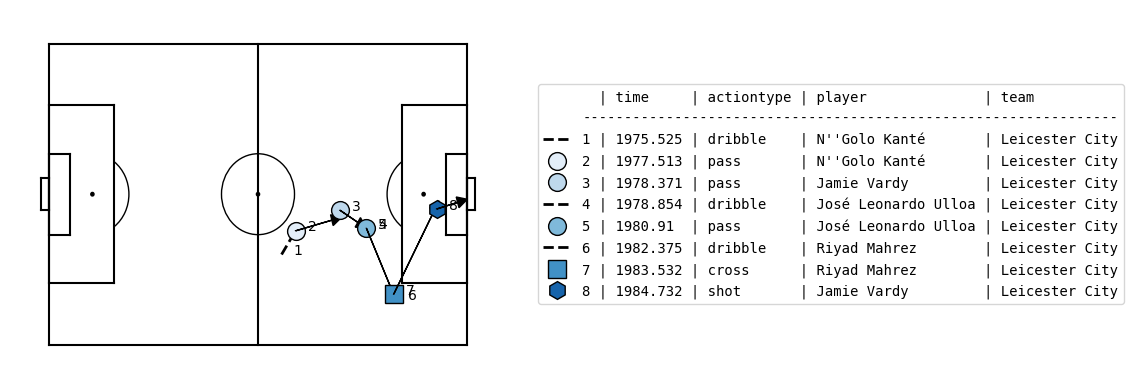

In [37]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=2, season_id=27) # 英超2015/2016赛季

ind_to_check = 3663826 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 7):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [38]:
lags = 13

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.004044,0.000501,0.003226,0.000378,0.003603,N'Golo Kanté,interception
1,0.009209,0.000282,0.005165,0.000219,0.005383,N'Golo Kanté,dribble
2,0.007715,0.000148,-0.001494,0.000134,-0.00136,N'Golo Kanté,pass
3,0.010371,0.000126,0.002656,0.000022,0.002678,Jamie Vardy,receival
4,0.018951,0.000177,0.00858,-0.000051,0.008529,Jamie Vardy,pass
5,0.019321,0.000153,0.00037,0.000024,0.000394,Leonardo Ulloa,receival
6,0.015909,0.000203,-0.003412,-0.000049,-0.003462,Leonardo Ulloa,dribble
7,0.015800,0.000134,-0.000109,0.000068,-0.000041,Leonardo Ulloa,pass
8,0.018283,0.000057,0.002483,0.000077,0.00256,Riyad Mahrez,receival
9,0.016648,0.000119,-0.001635,-0.000062,-0.001697,Riyad Mahrez,dribble


进球动作序列：
- N'Golo Kanté: 'interception'
- N'Golo Kanté: ['dribble', 'pass']
- Jamie Vardy: 'pass'
- Leonardo Ulloa: ['dribble', 'pass']
- Riyad Mahrez: ['dribble', 'cross']
- Jamie Vardy: 'shot'

In [39]:
vaep_delta = pd.DataFrame({
    'action':["N'Golo Kanté interception", "N'Golo Kanté dribble + pass", 'Jamie Vardy pass',
              'Leonardo Ulloa dribble + pass', 'Riyad Mahrez dribble + cross', 'Jamie Vardy shot', 'Jamie Vardy goal'],
    'P_score':[vaep_detailed.loc[0,'Y_hat_scores'], vaep_detailed.loc[2,'Y_hat_scores'],
               vaep_detailed.loc[4,'Y_hat_scores'], vaep_detailed.loc[7,'Y_hat_scores'],
               vaep_detailed.loc[10,'Y_hat_scores'], vaep_detailed.loc[12,'Y_hat_scores'],
               vaep_detailed.loc[13,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0,'vaep_value'], vaep_detailed.loc[1:2,'vaep_value'].sum(),
                  vaep_detailed.loc[3:4,'vaep_value'].sum(), vaep_detailed.loc[5:7,'vaep_value'].sum(),
                  vaep_detailed.loc[8:10,'vaep_value'].sum(), vaep_detailed.loc[11:12,'vaep_value'].sum(),
                  vaep_detailed.loc[13,'vaep_value']]
    })

print('xG: ',
      df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[12, 'Y_hat_scores'])

vaep_delta

xG:  0.19459532
Predicted xG: 0.28700495


,action,P_score,vaep_value
0,N'Golo Kanté interception,0.004044,0.003603
1,N'Golo Kanté dribble + pass,0.007715,0.004023
2,Jamie Vardy pass,0.018951,0.011207
3,Leonardo Ulloa dribble + pass,0.015800,-0.003109
4,Riyad Mahrez dribble + cross,0.036154,0.019980
5,Jamie Vardy shot,0.287005,0.251324
6,Jamie Vardy goal,0.999817,0.712705
